## Reference
https://towardsdatascience.com/exploratory-data-analysis-using-pandas-4f97de631456

![firepic](https://miro.medium.com/max/1875/1*-ivwwDICprQJ57snEH35bg.jpeg)

Pandas is a most powerful tool of Python that allows us to do anything and everything with datasets such as — analysing the data, organising, cleaning, sorting, filtering, aggregating, calculating and more!, which makes data analysis very easy.


# Dataset

- amazon fires

- downloaded from here kaggle
https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

This dataset contains 10 years of data which has total number of forest fires occurred in Amazon rainforest (Brazil states) for the period 1998 to 2017.

The Amazon is a vast region that spans across eight rapidly developing countries: Brazil, Bolivia, Peru, Ecuador, Colombia, Venezuela, Guyana, Suriname and French Guiana. The majority of the amazon forest is contained within Brazil, with 60% of the rainforest.

In [1]:
#!wget https://raw.githubusercontent.com/tonybutzer/assets/master/csv/amazon.csv

In [2]:
!ls *.csv

amazon.csv  pokemon.csv


In [3]:
import pandas as pd

amazon = pd.read_csv('amazon.csv', encoding = 'ISO-8859-1')

In [4]:
amazon.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


# Exercise for the student

- what does a 0.0 in the number field mean - should this be at least 1

# Dataset description:

    Column 1- ‘year’ : Year when forest fires happened
    Column 2- ‘state’ : Brazilian State
    Column 3- ‘month’ : Month when forest fires happened
    Column 4- ‘number’ : Number of forest fires reported
    Column 5- ‘date’ : Date when forest fires were reported

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
amazon.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


# Look at the number slice

In [7]:
amazon['number']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
6449    128.0
6450     85.0
6451    223.0
6452    373.0
6453    119.0
Name: number, Length: 6454, dtype: float64

# No rounding needed

but we could have done this

```
import numpy as np
amazon['number'] = amazon['number'].apply(np.round)
```

In [8]:
amazon['year'].min()

1998

In [9]:
amazon['year'].max()

2017

Now, let’s get started with our actual exercise i.e, to find the total number of forest fires in ‘Acre’ state:

In [10]:
acre_fires = sum(amazon[amazon['state'] == 'Acre']['number'])
print("Number if fires in Acre state are {}".format(acre_fires))

Number if fires in Acre state are 18464.03


maybe we do need to round so we dont get .03 fire - thats like half a boy in Andy Griffith

## Poor Horatio the half boy


In [11]:
from IPython.display import YouTubeVideo 


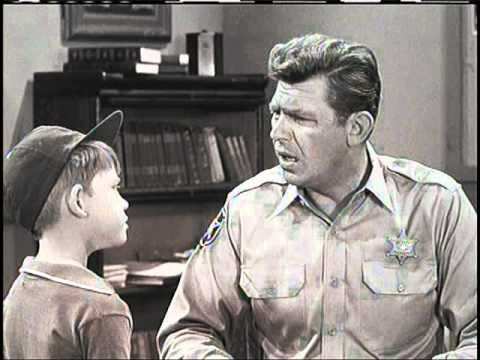

In [12]:
you_link = 'gGrL5C4uS1s'
YouTubeVideo(you_link)

In [13]:
import numpy as np
amazon['number'] = amazon['number'].apply(np.round)

In [14]:
acre_fires = sum(amazon[amazon['state'] == 'Acre']['number'])
print("Number if fires in Acre state are {}".format(acre_fires))

Number if fires in Acre state are 18463.0


# No more .03 fires or half-boys!

Step 1 : Let’s use boolean indexing to get only ‘Acre’ state subset and assign it to variable called ‘amazon_acre’

In [15]:
amazon_acre = amazon['state'] == 'Acre' 

‘amazon_acre’ will generate a series for us which shows True and False for each row based on our condition.

  Step 2: Let’s use this series to index the entire dataset and assign it to variable called ‘amazon_acre_data’

In [16]:
amazon_acre_data = amazon[amazon_acre] # total 239 entries

In [17]:
amazon_acre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 5 columns):
year      239 non-null int64
state     239 non-null object
month     239 non-null object
number    239 non-null float64
date      239 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [18]:
amazon_acre_data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [19]:
amazon_acre_number = amazon_acre_data['number']

In [20]:
amazon_acre_number

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
234    1.0
235    3.0
236    6.0
237    8.0
238    6.0
Name: number, Length: 239, dtype: float64

In [21]:
amazon_acre_number.sum()

18463.0

There you go.!! It’s always a best practice to break the code when we are experimenting the data for the first time. But, eventually to gain better programming skills we shall work on minimising the coding lines.

Now let’s use groupby() method on ‘year’ column and get total number of fires for each year.

In [22]:
acre_fires_year = amazon[amazon['state'] == 'Acre'].groupby('year').sum()

In [23]:
acre_fires_year.head(5)

,number
year,
1998,730.0
1999,333.0
2000,434.0
2001,828.0
2002,1544.0


Here in output, we see that ‘year’ is marked as index and ‘number’ as column. Just to make it more simple for visualising data, we can use reset_index() method to make index to be treated as a column.

In [24]:
acre_fires_year.reset_index(inplace=True)

In [25]:
acre_fires_year.head(8)

,year,number
0,1998,730.0
1,1999,333.0
2,2000,434.0
3,2001,828.0
4,2002,1544.0
5,2003,947.0
6,2004,1184.0
7,2005,984.0


# Plotting

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

    Matplotlib is python’s data visualisation library, which allows us to visualise the data and is very easy to get started for simple plots. Matplotlib consists of several plots like line, bar, scatter, histogram etc., I recommend you to explore the official Matplotlib webpage for more info.

    Seaborn is python’s most popular statistical visualisation library which is built on top of Matplotlib. Check out seaborn official webpage for all different types of seaborn plots.

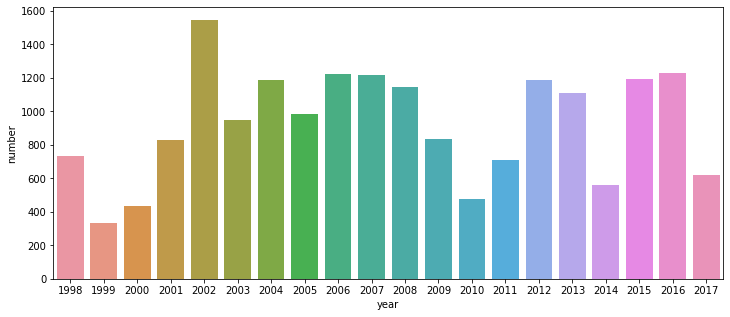

In [27]:
# Let’s visualise ‘acre_fires_year’ dataset using matplotlib and seaborn(barplot)

fig = plt.figure(figsize=(12,5))

sns.barplot(x='year', y='number', data=acre_fires_year)

Exercise 3 : To find out total number of fires in all states

For this, let’s use groupby() on ‘state’ column and find out total number of fires.

In [28]:
total_fires = amazon.groupby('state')['number'].sum().reset_index()

In [29]:
total_fires.head(9)

,state,number
0,Acre,18463.0
1,Alagoas,4644.0
2,Amapa,21831.0
3,Amazonas,30647.0
4,Bahia,44745.0
5,Ceara,30426.0
6,Distrito Federal,3561.0
7,Espirito Santo,6546.0
8,Goias,37692.0


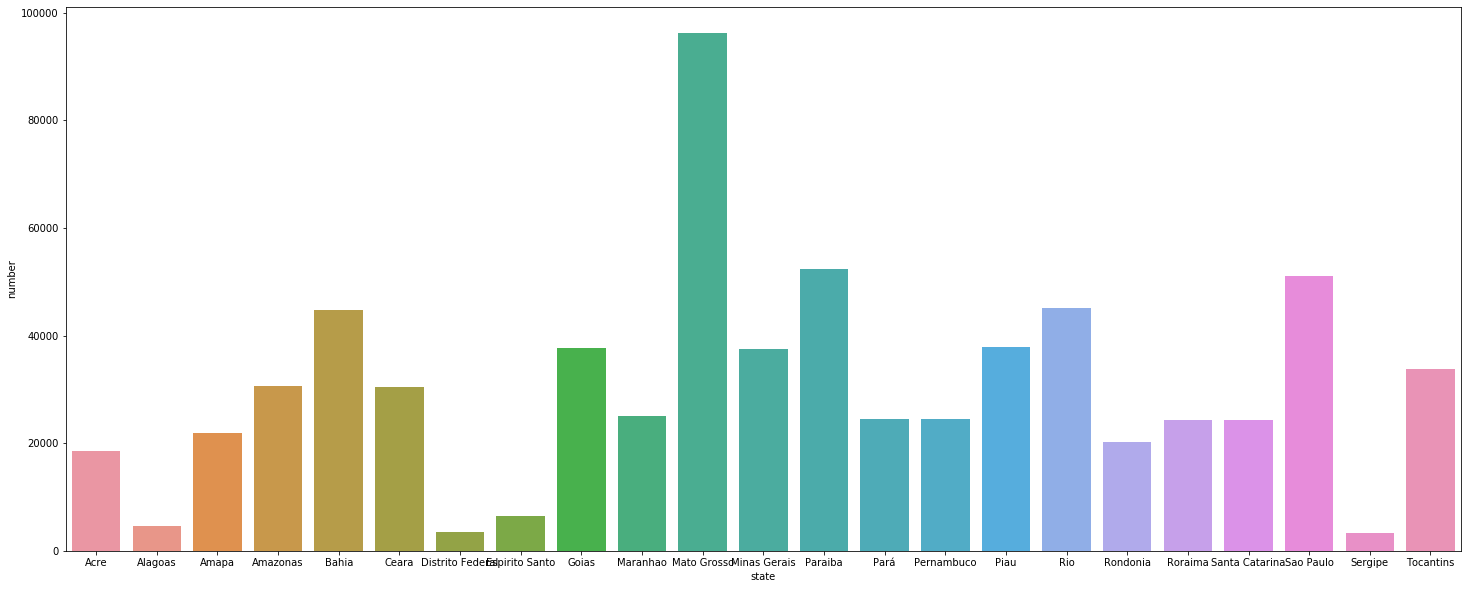

In [30]:
fig = plt.figure(figsize=(25,10))

sns.barplot(x='state', y='number', data=total_fires)

It’s clear from above plot that most forest fires occurred in ‘Mato Grosso’, followed by ‘Paraiba’ and ‘Sao Paulo’ states.

# Exercise 4

Exercise 4 : To find out total number of fires in 2017 and visualising data based on each ‘month’

In [31]:
total_fires_2017 = amazon[amazon['year'] == 2017][['number', 'month']].groupby('month').sum().reset_index()

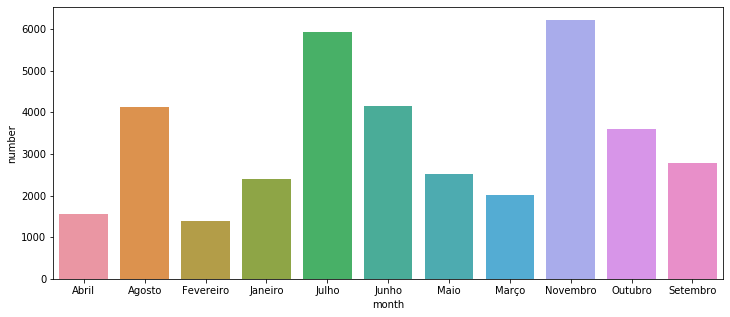

In [32]:
fig = plt.figure(figsize=(12,5))

sns.barplot(x='month', y='number', data=total_fires_2017)

Exercise 5 : To find out average number of fires occurred

In [33]:
avg_fires = amazon['number'].mean()
avg_fires

108.28819336845368

Exercise 6 : To find out the state names where fires occurred in ‘December’ month

In [34]:
dec_fires = amazon[amazon['month'] == 'Dezembro']['state'].unique()
print("Below are the list of Brazil states where fires occurred in December! :: \n \n {}".format(dec_fires))

Below are the list of Brazil states where fires occurred in December! :: 
 
 ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


![thats all](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRUm8WcFPBYsUwESc0BxvoUvLkbOW5WnW1cndYrZyi3cGB6QDjq)

# Credit goes to this author 
- https://towardsdatascience.com/exploratory-data-analysis-using-pandas-4f97de631456
    - https://towardsdatascience.com/@mamatha.bbb

# Only Science can prevent forest fires!

![fires aussie](https://i.guim.co.uk/img/media/7a4d92cabc7a41a422ce54a4793ffff954e244d2/0_1_2048_1229/master/2048.jpg?width=620&quality=45&auto=format&fit=max&dpr=2&s=cdfdd0f80b697e1d7165afd884345088)